In [2]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import HuberRegressor
import matplotlib.pyplot as plt
from sklearn import metrics 
import plotly.express as px
import plotly.graph_objects as go
from IPython.display import HTML
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import make_pipeline
from sklearn.svm import SVC
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import cross_val_score

In [3]:
df = pd.read_csv("BTC1.csv")
df.head()

,date,open,high,low,close
0,44378.0,34822.2,35206.4,32799.1,33505.1
1,44379.0,33501.1,33950.7,32733.8,33465.9
2,44380.0,33464.6,34929.1,33355.4,34595.3
3,44381.0,34580.0,35944.4,34295.9,35866.5
4,44382.0,35889.4,35889.4,33180.9,34169.8


In [4]:
y = df['close']
X = df.drop(columns = ['close'],axis = 1)

In [5]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.25, random_state=46)

In [6]:
model = HuberRegressor()
model.fit(X_train,y_train)

HuberRegressor()

In [7]:
y_pred = model.predict(X_test)

In [8]:
scores = cross_val_score(model, X, y, cv=5, scoring='neg_mean_squared_error')
mean_score = -scores.mean()
print("平均得分：", mean_score)

平均得分： 195433.85433454465


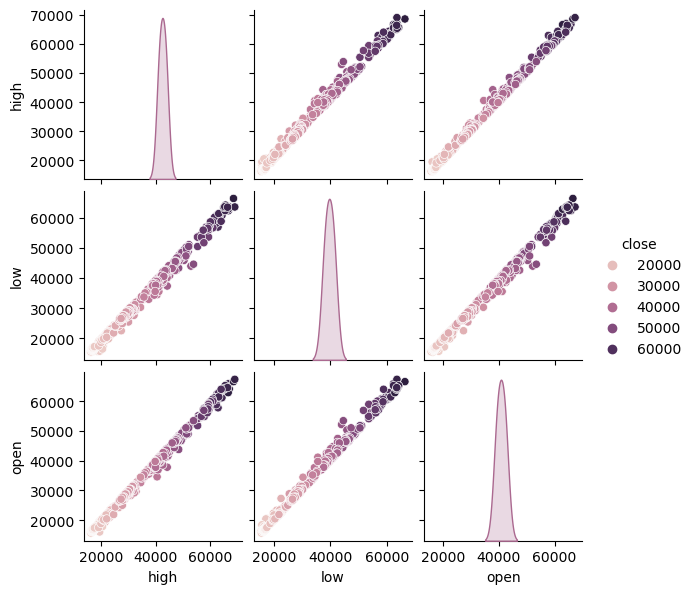

In [9]:
sns.pairplot(df, vars=['high','low','open'],
             hue = 'close',height = 2);

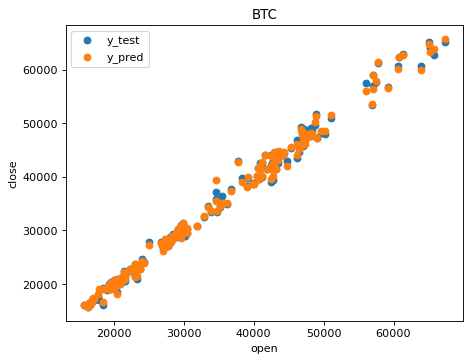

In [10]:
a = X_test.open
b = y_test

c = X_test.open
d = y_pred

plt.figure(dpi= 80)
plt.scatter(a, b)
plt.scatter(c, d)
plt.legend(["y_test", "y_pred"])
plt.xlabel("open")
plt.ylabel("close")
plt.title("BTC")
plt.show()

In [11]:
model.score(X_test,y_test)

0.9989229743910816

In [12]:
X_365 = X.iloc[-365:]
X_365

,date,open,high,low
336,44714.0,29566.3,30381.2,29490.5
337,44715.0,30340.1,30674.0,29312.4
338,44716.0,29781.2,29923.7,29460.2
339,44717.0,29823.7,30157.8,29519.1
340,44718.0,29937.1,31738.6,29846.9
...,...,...,...,...
696,45074.0,26781.2,27957.9,26772.6
697,45075.0,27841.4,28455.4,27532.3
698,45076.0,27675.0,28049.5,27565.4
699,45077.0,27730.2,27843.6,26849.8


In [13]:
ypred365 = model.predict(X_365)

In [14]:
from sklearn.linear_model import HuberRegressor
import time
from sklearn.metrics import mean_squared_error, r2_score
import numpy as np

def smape(y_true, y_pred):
    return 100/len(y_true) * np.sum(2 * np.abs(y_pred - y_true) / (np.abs(y_true) + np.abs(y_pred)))

def wape(y_true, y_pred, weights):
    return 100 * np.sum(np.abs(y_true - y_pred) * weights) / np.sum(np.abs(y_true) * weights)

clf = HuberRegressor(epsilon=1.35)

clf.fit(X_train, y_train)
start_time = time.time()

clf.fit(X_train, y_train)
y_pred = clf.predict(X_test)
rmse = mean_squared_error(y_test, y_pred, squared=False)
r2 = r2_score(y_test, y_pred)
smape_val = smape(y_test, y_pred)
weights_test = np.ones(len(y_test))
wape_val = wape(y_test, y_pred, weights_test)

end_time = time.time()
mse = mean_squared_error(y_test, y_pred)

print("HuberRegressor BTC")
print('均方誤差（Mean Squared Error）:', mse)
print('RMSE:', rmse)
print('R-squared:', r2)
print('SMAPE:', smape_val)
print('WAPE:', wape_val)
print('執行時間:', end_time - start_time)

HuberRegressor BTC
均方誤差（Mean Squared Error）: 186253.39087398676
RMSE: 431.5708410840412
R-squared: 0.9989229743910816
SMAPE: 0.8191062330411638
WAPE: 0.8072283458625908
執行時間: 0.015004634857177734


In [15]:
import plotly.express as px

fig = px.scatter_matrix(df, dimensions=["open", "high", "low"], color="close")
fig.update_layout(
    title="BTC",
    title_font=dict(size=20),
    height=600,
    width=800
)
fig.update_traces(diagonal_visible=False)
fig.show()


In [16]:
import plotly.graph_objs as go
from datetime import datetime, timedelta

start_date = datetime(2023, 6, 1)
x_values = [(start_date + timedelta(days=i)).strftime('%Y-%m-%d') for i in range(60)]
fig = go.Figure()
fig.add_trace(go.Scatter(x=x_values, y=y_pred, mode='lines'))
fig.update_layout(
    title='BTC Closing Price Prediction',
    xaxis_title='Date',
    yaxis_title='Close',
    height=600,
    width=800  # Adjust the width to achieve a 3:4 aspect ratio
)
fig.show()


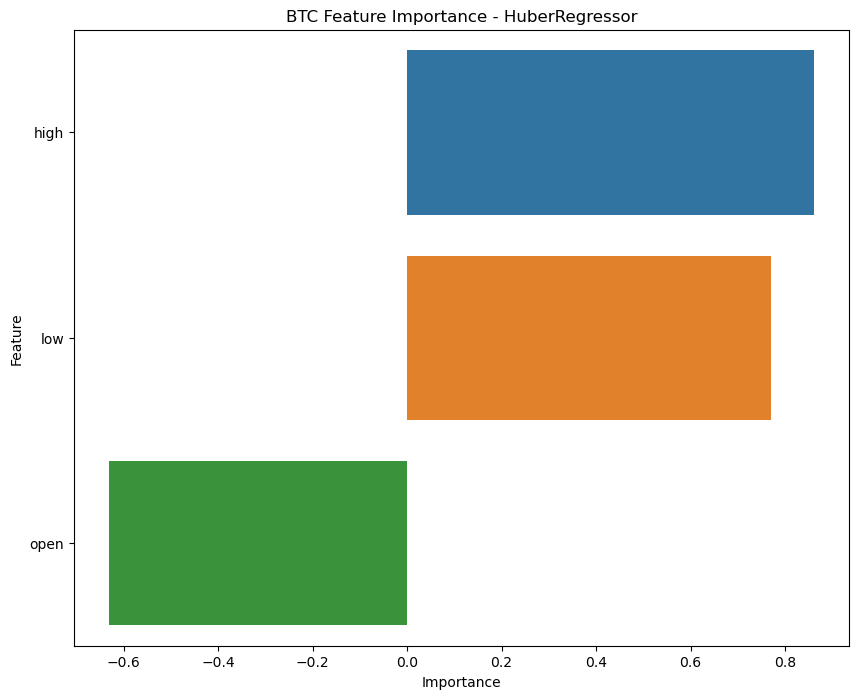

In [17]:
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import HuberRegressor

clf = HuberRegressor()

clf.fit(X[['high', 'low', 'open']], y)

feature_importance = clf.coef_
features = ['high', 'low', 'open']

feat_importances = pd.DataFrame({'feature': features, 'importance': feature_importance})
feat_importances = feat_importances.sort_values(by='importance', ascending=False)

plt.figure(figsize=(10, 8))
sns.barplot(x='importance', y='feature', data=feat_importances)
plt.title('BTC Feature Importance - HuberRegressor')
plt.xlabel('Importance')
plt.ylabel('Feature')
plt.show()
